In [1]:
# Si necesitan instalar algunos paquetes
#!pip install scipy
#!pip install pandas
#!pip install seaborn
#!pip install scikit-learn

In [3]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# Para clustering
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Para componentes principales
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**Ejercicio 1.** Utilizando los datos de pingüinos, 
1. Construir la matrix de datos $X$ con las variables "bill_length_mm" y "bill_depth_mm".
2. Construir la matriz $X^\star$ de datos normalizados (media 0).
3. Construir la matriz de covarianza $\Sigma$.
4. Comparar con el resultado de `np.cov(X.transpose(), bias = 1))`

In [5]:
# Eliminamos datos faltantes y reseteamos los índices, para no tener problemas al graficar
penguins = sns.load_dataset("penguins").dropna().reset_index(drop=True)

# Normalizamos las variables "bill_length_mm" y "bill_depth_mm" por MinMax
penguins[["bill_length_mm", "bill_depth_mm"]] = MinMaxScaler().fit_transform(penguins[["bill_length_mm", "bill_depth_mm"]])

penguins.head()

pandas.core.frame.DataFrame

In [3]:
# Item 1
X = penguins[["bill_length_mm", "bill_depth_mm"]]
X.head()

,bill_length_mm,bill_depth_mm
0,0.254545,0.666667
1,0.269091,0.511905
2,0.298182,0.583333
3,0.167273,0.738095
4,0.261818,0.892857


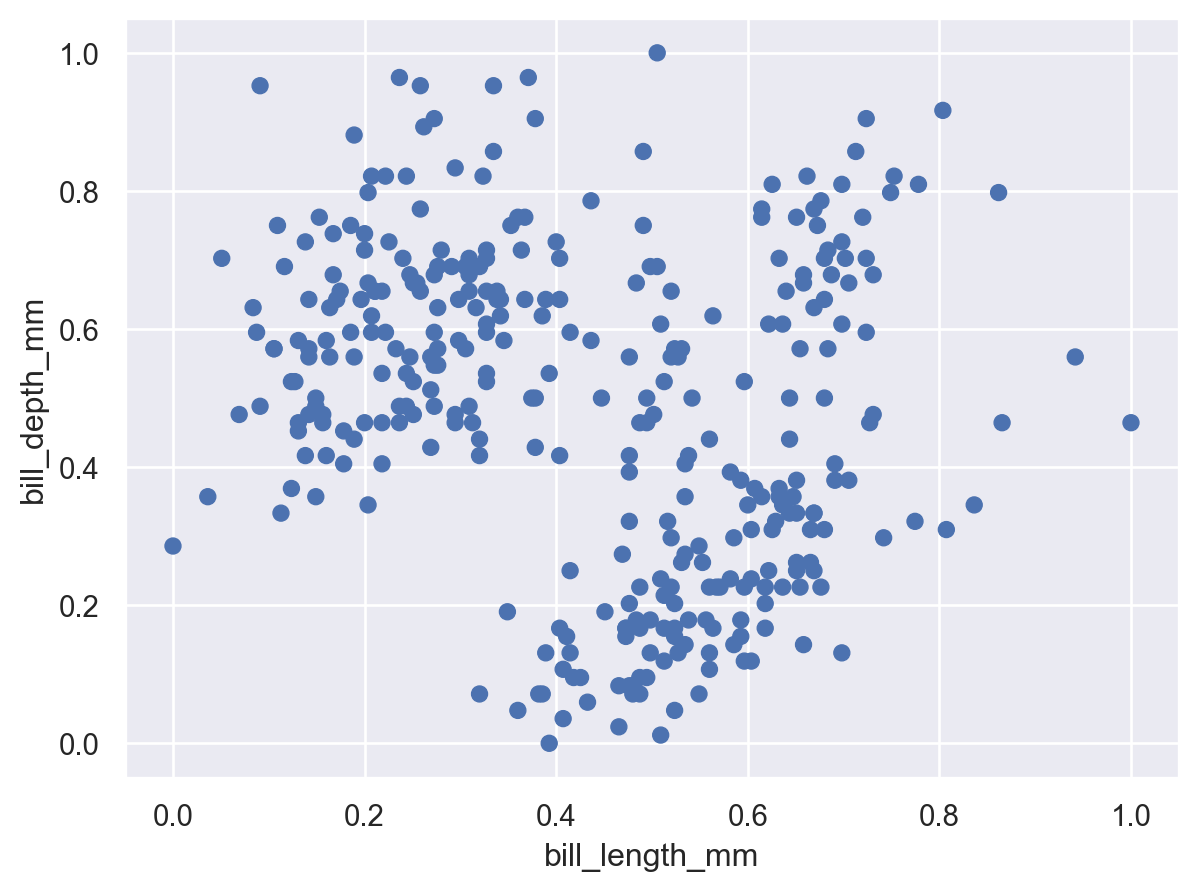

In [4]:
# Graficamos
(
    so.Plot(data = penguins, x = "bill_length_mm", y = "bill_depth_mm")
    .add(so.Dot())
)

In [5]:
# Media de cada columna 
X.mean()

bill_length_mm    0.432465
bill_depth_mm     0.483912
dtype: float64

In [6]:
X_star = X - X.mean()
X_star.head() # <- Esta es la columna X star, la que aparece en la presentación

,bill_length_mm,bill_depth_mm
0,-0.177920,0.182754
1,-0.163374,0.027992
2,-0.134283,0.099421
3,-0.265192,0.254183
4,-0.170647,0.408945


In [7]:
X_star.mean()

bill_length_mm   -1.066881e-17
bill_depth_mm    -9.601929e-17
dtype: float64

In [14]:
n = len(X_star)
# El arroba es el producto de matrices
Sigma = (X_star.T @ X_star) / n
Sigma

,bill_length_mm,bill_depth_mm
bill_length_mm,0.039427,-0.010626
bill_depth_mm,-0.010626,0.054794


In [13]:
# Comando de numpy (tenemos que pasarle las variables como columnas)
# Si no usamos bias = 1, divide por n-1 en lugar de n.
np.cov(X.transpose(), bias = 1)

array([[ 0.03942681, -0.0106264 ],
       [-0.0106264 ,  0.05479369]])

**Ejercicio 2**
1. Calcular las componentes principales de la matriz X del ejercicio anterior.
2. Graficar los datos normalizados y las componentes principales.
3. Realizar un nuevo gráfico con los datos transformados.

In [15]:
gamma, U = np.linalg.eigh(Sigma)   # eigh es un comando especial para matrices simétricas
print(gamma)
print(U)

[0.03399707 0.06022344]
[[-0.89048655 -0.45500956]
 [-0.45500956  0.89048655]]


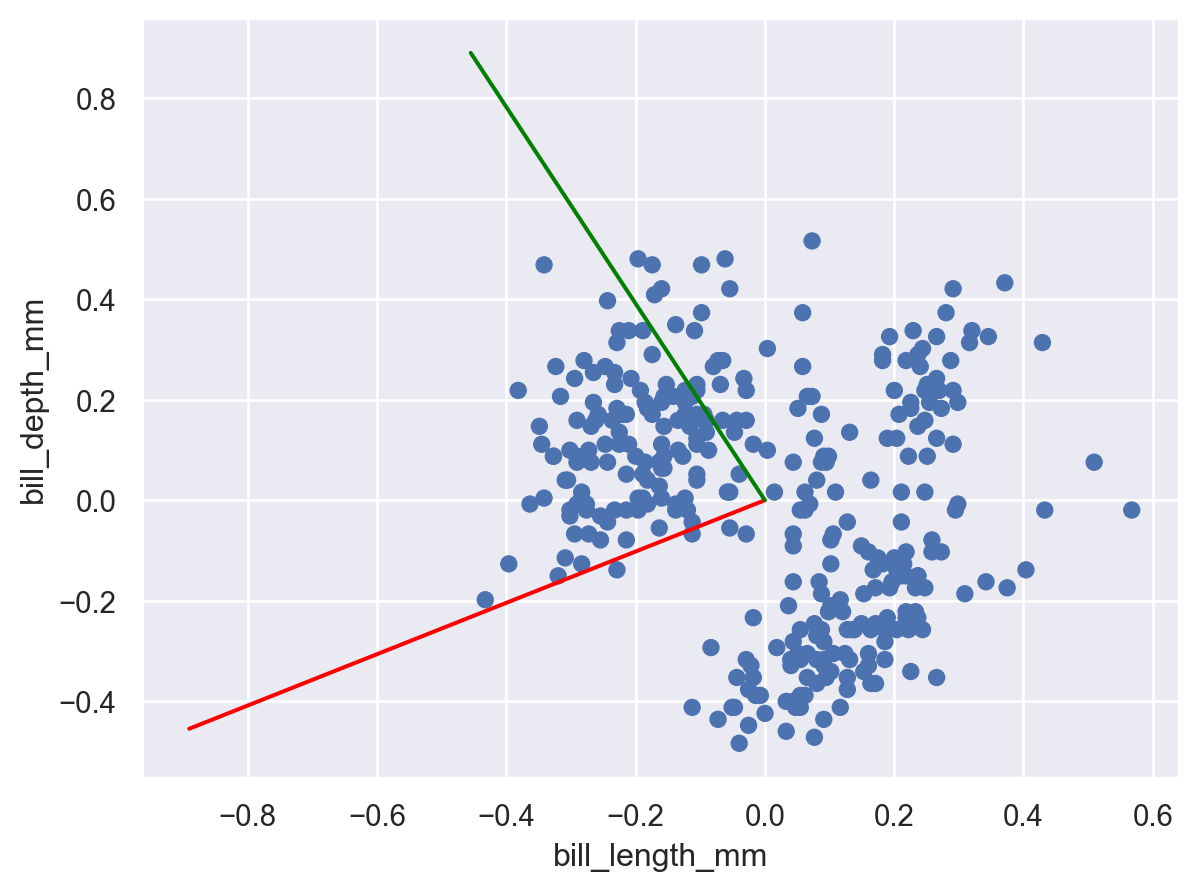

In [19]:
(
    so.Plot()
    .add(so.Dot(), x = X_star["bill_length_mm"], y = X_star["bill_depth_mm"])
    .add(so.Line(color = "red"), x = [0, U[0,0]], y = [0, U[1,0]])
    .add(so.Line(color = "green"), x = [0, U[0,1]], y = [0, U[1,1]])
)

In [21]:
Z = pd.DataFrame(U.T @ X_star.T).T
Z.columns = ["Z1", "Z2"]
Z

,Z1,Z2
0,0.075280,0.243695
1,0.132746,0.099264
2,0.074340,0.149633
3,0.120495,0.347011
4,-0.034115,0.441806
...,...,...
328,0.083830,-0.420377
329,0.064282,-0.350153
330,-0.128125,-0.261303
331,0.089009,-0.270674


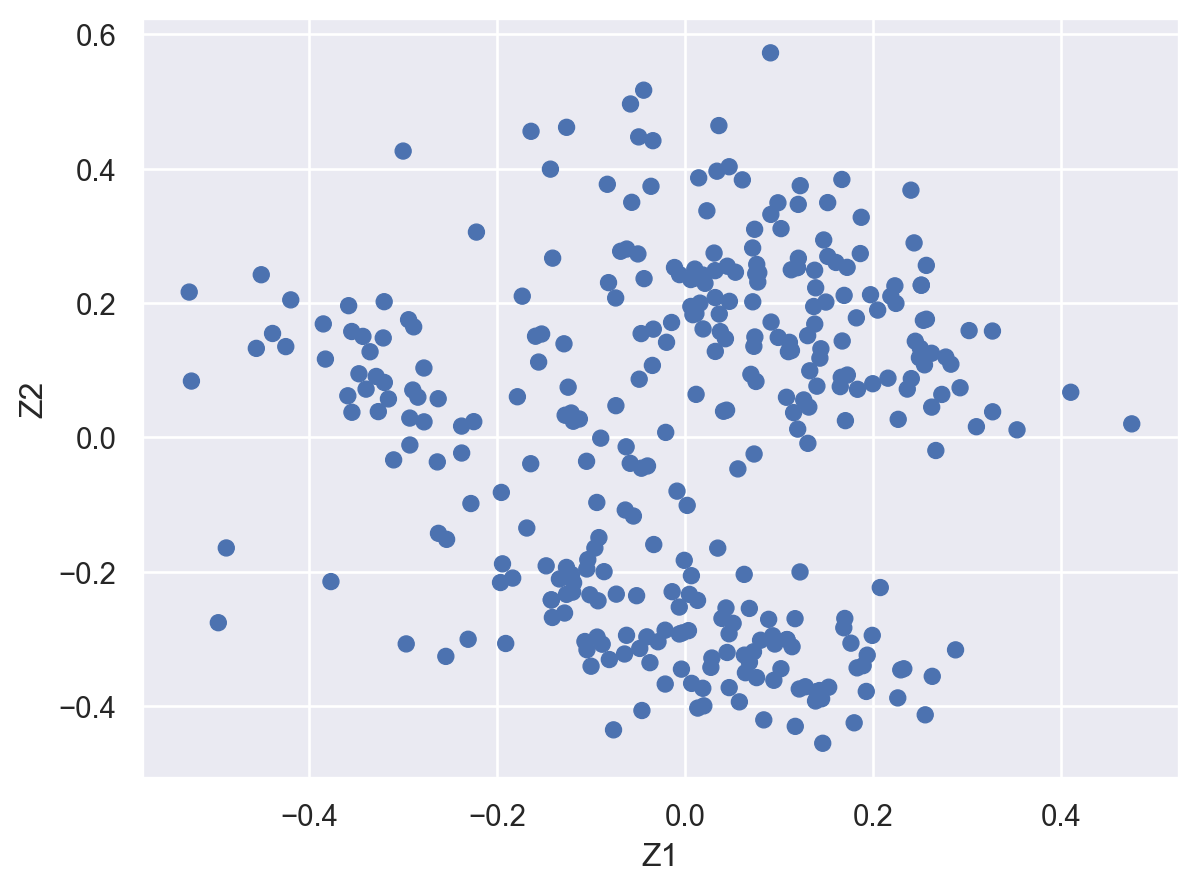

In [22]:
(
    so.Plot(data = Z, x = "Z1", y = "Z2")
    .add(so.Dot())
)

**Ejercicio:** Para la matriz de covarianza
$$
M = \left(
   \begin{array}{cccc}
    3 & 1/2 & 1/3 & 0\\
    1/2 & 4 & 1/6 & 3/4\\
    1/3 & 1/6 & 2 & 0 \\
    0 & 3/4 & 0 & 5
   \end{array}
   \right)
$$
calcular la varianza explicada acumulada de las dos primeras componentes principales.

### Aplicación

En el archivo paises.csv se encuentran 11 variables ecónomicas y sociales asociadas a 21 países. Queremos usar esas variables para visualizar países con comportamientos similares.

In [27]:
# Leemos los datos
datos = pd.read_csv("../../Datos/paises.csv", index_col = "Pais")   # dataFrame
X.columns = datos.columns.str.strip()
print(datos)

               X1   X2  X3      X4      X5   X6    X7  X8   X9   X10   X11
Pais                                                                      
Albania       1.0   30  41    2199    3903   12    94  53  0.0   341   1.2
Angola        3.0  124  46    4422     955    6    57  19  0.7    89   0.5
Arabia Saudi  4.3   21  13  133540   91019   96   497   1  0.0  4566  13.1
Argelia       2.5   34  24   44609   19883   42   180   2  0.8   906   3.0
Argentina     1.3   22  31  278431   65962  160  1043  22  0.1  1504   3.5
Australia     1.4    6  43  337909  167155  510   933  19  0.0  5341  15.3
Austria       0.6    6  41  216547   53259  465   304  47 -0.4  3301   7.2
Bangladesh    2.0   79  42   28599    9891    2   220   6  4.1    64   0.2
Belgica       0.3    8  40  250710   72236  457   917  20 -0.3  5120  10.1
Benin         3.0   95  48    2034       6    5    26  45  1.3    20   0.1
Tailandia     1.3   35  46  159630   71177   59   602  25  3.5   769   2.0
Tanzania      3.1   82  4

In [28]:
X.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11'], dtype='object')

Los variables corresponden a los siguientes indicadores:

1. X1 = Tasa anual de crecimiento de la población
2. X2 = Tasa de mortalidad infantil por cada 1000 nacidos vivos, 
3. X3 = Porcentaje de mujeres en la población activa, 
4. X4 = PNB en 1995 (en millones de dólares), 
5. X5 = Producción de electricidad (en millones kW/h), 
6. X6 = Líneas telefónicas por cada 1000 habitantes, 
7. X7 = Consumo de agua per cápita, 
8. X8 = Proporción de la superficie del país cubierta por bosques, 
9. X9 = Proporción de deforestación anual, 
10. X10 = Consumo de energía per cápita, 
11. X11 = Emisión de CO2 per cápita.



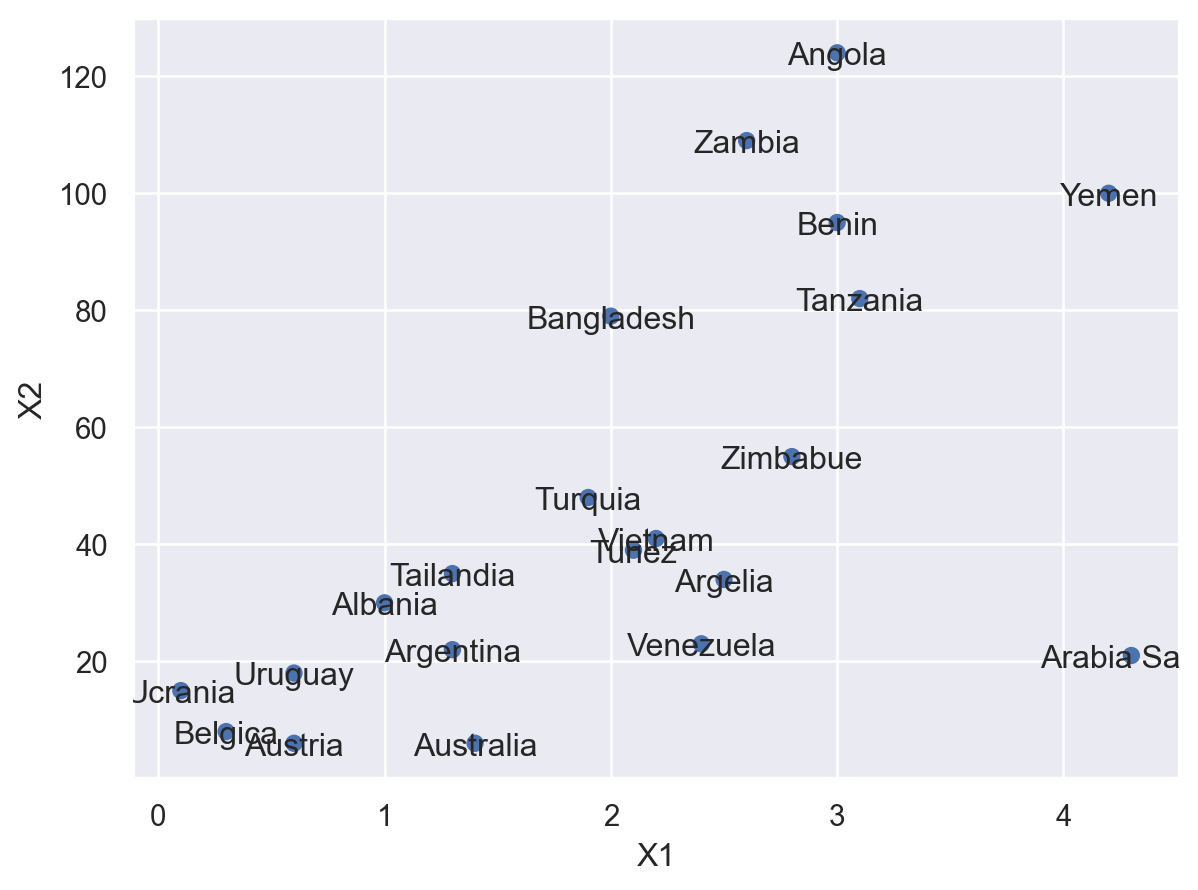

In [29]:
# Graficamos algunos pares de variables
(
    so.Plot(data = X, x = "X1", y = "X2", text = datos.index)
    .add(so.Dot())
    .add(so.Text())
)

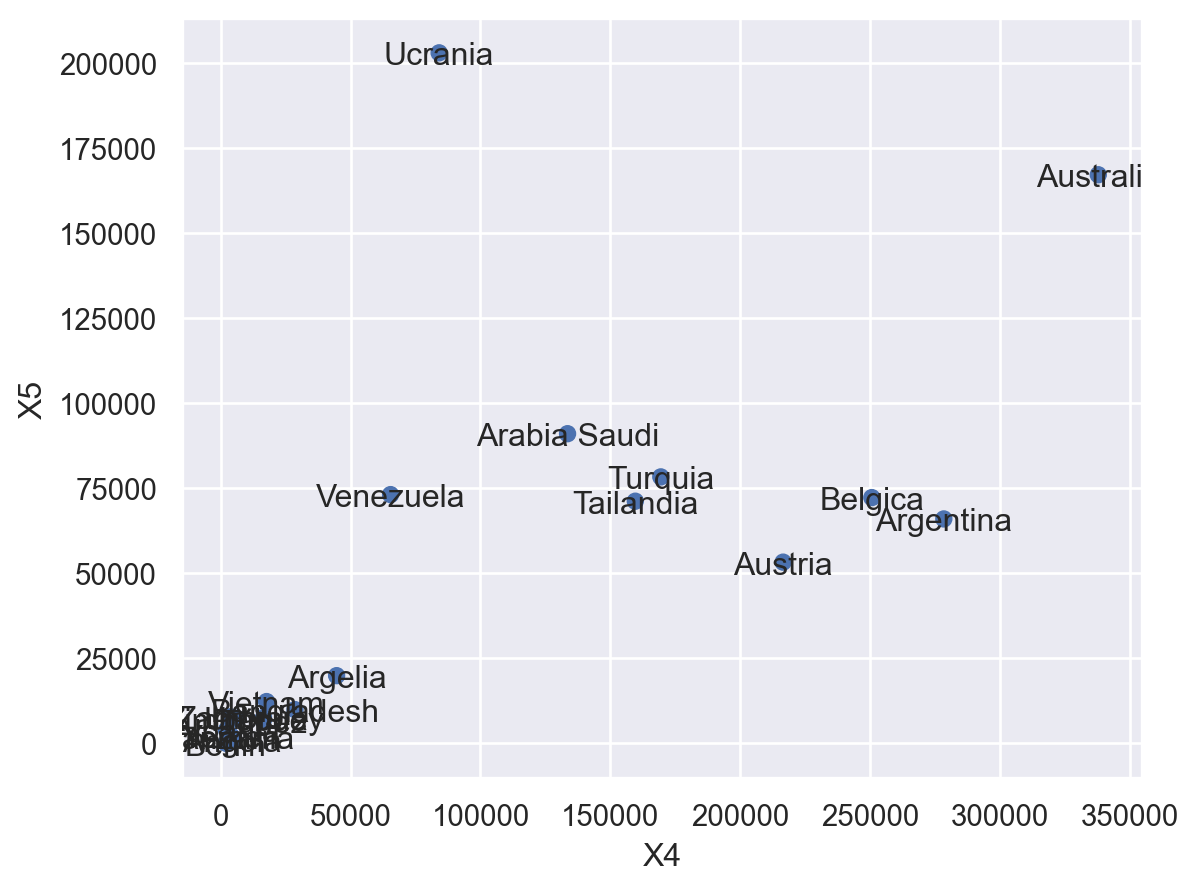

In [55]:
# Graficamos la información de dos variables 

# X4 = PNB en 1995 (en millones de dólares),
# X5 = Producción de electricidad (en millones kW/h),
(
    so.Plot(data = X, x = "X4", y = "X5", text = datos.index)
    .add(so.Dot())
    .add(so.Text())
)

In [80]:
# En estos ejemplos los países aparecen muy juntos, queremos ver si encontramos nuevas variables que nos permitan separar mejor a los países.

In [30]:
# Como tenemos datos en distintas escalas llevamos los datos a media 0 y varianza 1.
X_star = StandardScaler().set_output(transform="pandas").fit_transform(X)
print(X_star)

                    X1        X2        X3        X4        X5        X6  \
Pais                                                                       
Albania      -0.902226 -0.482339  0.222849 -0.825028 -0.754949 -0.703428   
Angola        0.844018  2.162486  0.767014 -0.803620 -0.808442 -0.741241   
Arabia Saudi  1.979077 -0.735567 -2.824479  0.439794  0.825820 -0.174057   
Argelia       0.407457 -0.369793 -1.627314 -0.416617 -0.464983 -0.514367   
Argentina    -0.640290 -0.707430 -0.865482  1.835103  0.371147  0.229274   
Australia    -0.552978 -1.157613  0.440515  2.407879  2.207351  2.434991   
Austria      -1.251475 -1.157613  0.222849  1.239156  0.140644  2.151399   
Bangladesh   -0.029104  0.896346  0.331682 -0.570794 -0.646293 -0.766449   
Belgica      -1.513412 -1.101340  0.114016  1.568148  0.484992  2.100982   
Benin         0.844018  1.346529  0.984681 -0.826617 -0.825662 -0.747543   
Tailandia    -0.640290 -0.341657  0.767014  0.691042  0.465776 -0.407232   
Tanzania    

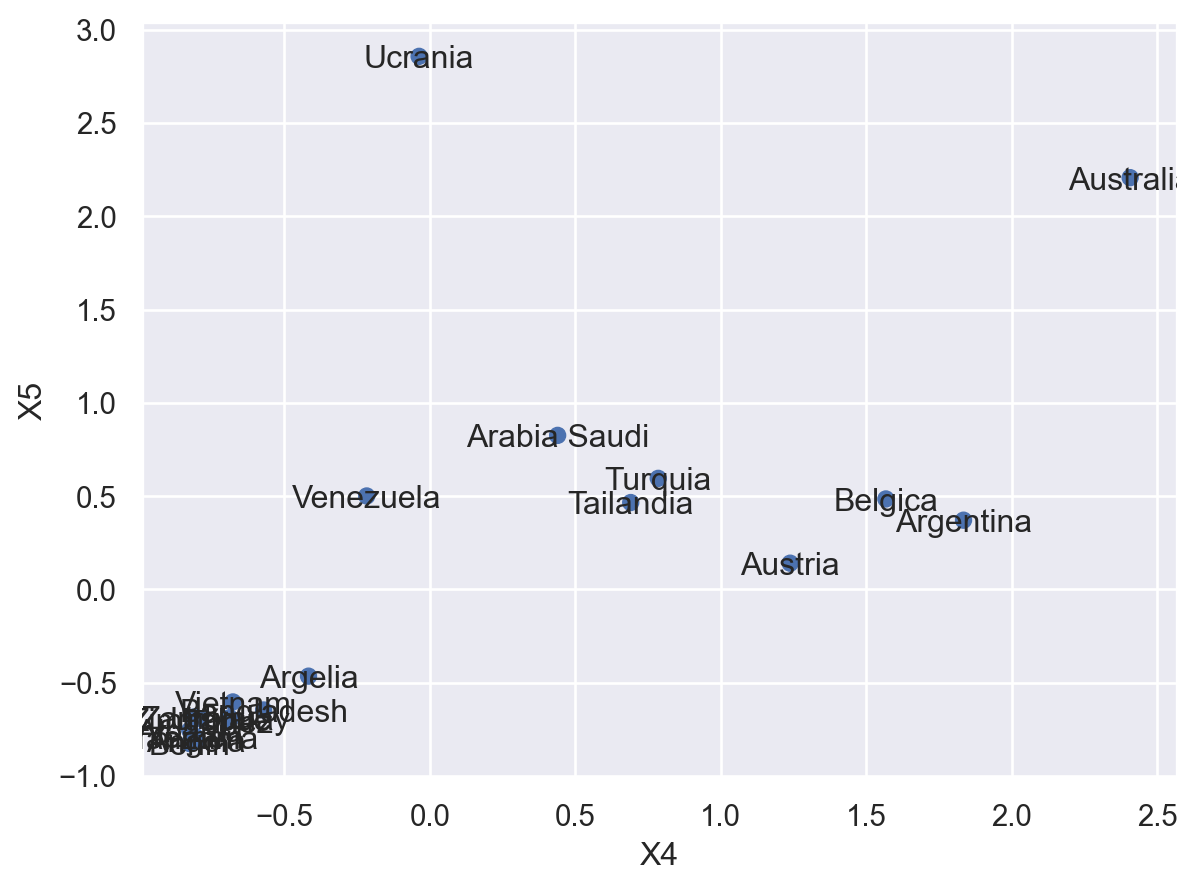

In [31]:
# Graficamos la información de dos variables 

# X4 = PNB en 1995 (en millones de dólares),
# X5 = Producción de electricidad (en millones kW/h),
(
    so.Plot(data = X_star, x = "X4", y = "X5", text = datos.index)
    .add(so.Dot())
    .add(so.Text())
)

In [32]:
# Calculamos la matriz de covarianza:
# cov = (X - Xraya)^T * (X - Xraya) / N = (B^T * B) / N
X_star_t = np.transpose(X_star)
N = len(X_star)
Sigma = (X_star_t @ X_star) / N
print(Sigma)

           X1        X2        X3        X4        X5        X6        X7  \
X1   1.000000  0.629606 -0.380853 -0.446483 -0.425196 -0.583977 -0.442263   
X2   0.629606  1.000000  0.258119 -0.626758 -0.597896 -0.656055 -0.615723   
X3  -0.380853  0.258119  1.000000 -0.155930 -0.030875 -0.014938 -0.187816   
X4  -0.446483 -0.626758 -0.155930  1.000000  0.672974  0.835755  0.860429   
X5  -0.425196 -0.597896 -0.030875  0.672974  1.000000  0.588598  0.727782   
X6  -0.583977 -0.656055 -0.014938  0.835755  0.588598  1.000000  0.638939   
X7  -0.442263 -0.615723 -0.187816  0.860429  0.727782  0.638939  1.000000   
X8  -0.139033  0.083098  0.460945 -0.034205 -0.098846  0.020698 -0.232275   
X9   0.162366  0.350169  0.333558 -0.170113 -0.175931 -0.398086 -0.210303   
X10 -0.325678 -0.684482 -0.270369  0.773268  0.767040  0.817128  0.682377   
X11 -0.278883 -0.663817 -0.263690  0.700910  0.857659  0.721509  0.648466   

           X8        X9       X10       X11  
X1  -0.139033  0.162366 -0.32

In [33]:
# Comparamos con el comando cov de numpy
print(np.cov(np.transpose(X_star), bias = 1))

# Tenemos que transponer X porque cov requiere variables en filas
# El parámetro bias = 1 hace que divida por N. Si no lo ponemos, o ponemos bias = 0, divide por N-1.

[[ 1.          0.62960563 -0.38085272 -0.44648335 -0.42519569 -0.58397672
  -0.44226306 -0.13903328  0.16236635 -0.3256778  -0.27888323]
 [ 0.62960563  1.          0.25811855 -0.6267577  -0.59789643 -0.65605528
  -0.6157233   0.0830981   0.35016856 -0.68448239 -0.66381678]
 [-0.38085272  0.25811855  1.         -0.15593001 -0.03087508 -0.01493831
  -0.18781641  0.46094529  0.33355766 -0.27036942 -0.26368959]
 [-0.44648335 -0.6267577  -0.15593001  1.          0.6729744   0.83575465
   0.86042885 -0.03420469 -0.17011318  0.77326805  0.70090974]
 [-0.42519569 -0.59789643 -0.03087508  0.6729744   1.          0.58859806
   0.72778184 -0.09884628 -0.17593148  0.76703996  0.85765874]
 [-0.58397672 -0.65605528 -0.01493831  0.83575465  0.58859806  1.
   0.63893862  0.02069816 -0.39808578  0.81712791  0.72150917]
 [-0.44226306 -0.6157233  -0.18781641  0.86042885  0.72778184  0.63893862
   1.         -0.23227504 -0.21030306  0.68237744  0.64846582]
 [-0.13903328  0.0830981   0.46094529 -0.03420469

Obtuvimos la misma matriz!

Ahora podemos calcular las componentes principales.
Calculamos primero los autovalores y autovectores de la matriz de covarianza y los ordenamos los autovectores por autovalor.

In [34]:
gamma, U = np.linalg.eigh(Sigma)  # Usamos eigh porque A es simétrica. Podemos usar eig también
print(gamma)
print(U)

[2.88774979e-03 3.25582148e-02 7.81459028e-02 1.06712764e-01
 3.55335107e-01 4.81437963e-01 5.55648302e-01 7.88538421e-01
 9.87267285e-01 1.80967483e+00 5.80179346e+00]
[[ 5.00990711e-02  1.58410366e-01 -3.75722359e-01  4.59557273e-01
  -4.17835886e-02 -1.61304573e-01  1.10114143e-02  5.25712075e-01
  -2.41768349e-01 -4.52161932e-01 -2.29944001e-01]
 [-5.10064788e-02 -3.51761007e-02  3.34109620e-01 -4.89773662e-01
  -5.58942175e-02 -6.14321278e-01 -2.27542828e-01  2.30561638e-01
  -2.08611582e-01 -2.24073149e-02 -3.39386829e-01]
 [ 4.79569764e-02 -1.19634971e-01 -1.31315145e-01  4.88161730e-01
   5.18702043e-02 -2.67124067e-01 -4.59869710e-01 -7.56881984e-02
  -8.35168266e-02  6.49484044e-01 -8.82203928e-02]
 [ 9.17897113e-02 -6.32703336e-01 -3.24743511e-01 -9.53786067e-02
  -4.51353153e-04 -3.49845512e-01  4.21670826e-01  4.79786170e-02
  -1.90078782e-01  6.81883990e-02  3.65274952e-01]
 [ 2.46236551e-01  1.88884109e-01 -3.81797594e-01 -3.81892563e-01
  -4.22832116e-01  1.98174051e-01

In [71]:
# Los autovalores están ordenados de menor a mayor.
# Damos vueltas las columnas de la matriz de autovectores usando np.flip(-,1)
U = np.flip(U, 1)   # U tiene los autovectores de Sigma como columnas
print(U)

[[-2.29944001e-01  4.52161932e-01  2.41768349e-01  5.25712075e-01
  -1.10114143e-02 -1.61304573e-01 -4.17835886e-02  4.59557273e-01
  -3.75722359e-01  1.58410366e-01 -5.00990711e-02]
 [-3.39386829e-01  2.24073149e-02  2.08611582e-01  2.30561638e-01
   2.27542828e-01 -6.14321278e-01 -5.58942175e-02 -4.89773662e-01
   3.34109620e-01 -3.51761007e-02  5.10064788e-02]
 [-8.82203928e-02 -6.49484044e-01  8.35168266e-02 -7.56881984e-02
   4.59869710e-01 -2.67124067e-01  5.18702043e-02  4.88161730e-01
  -1.31315145e-01 -1.19634971e-01 -4.79569764e-02]
 [ 3.65274952e-01 -6.81883990e-02  1.90078782e-01  4.79786170e-02
  -4.21670826e-01 -3.49845512e-01 -4.51353153e-04 -9.53786067e-02
  -3.24743511e-01 -6.32703336e-01 -9.17897113e-02]
 [ 3.46900282e-01 -5.89703905e-02  2.75037632e-01  9.27843128e-02
   4.31215872e-01  1.98174051e-01 -4.22832116e-01 -3.81892563e-01
  -3.81797594e-01  1.88884109e-01 -2.46236551e-01]
 [ 3.61998663e-01 -1.42056552e-01 -1.67044217e-01  7.49780074e-02
  -1.01065820e-01 -

In [72]:
# Verificamos que es una matriz ortogonal
print(np.linalg.norm(U[:,1]))
print(np.transpose(U) @ U)

1.0000000000000004
[[ 1.00000000e+00  6.93889390e-18  1.38777878e-17  8.32667268e-17
  -5.55111512e-17  1.52655666e-16  2.77555756e-17  2.22044605e-16
  -3.46944695e-17  2.77555756e-17  0.00000000e+00]
 [ 6.93889390e-18  1.00000000e+00  0.00000000e+00 -2.01227923e-16
  -1.17961196e-16  1.38777878e-17  6.93889390e-18 -2.98372438e-16
   2.42861287e-17  1.38777878e-17 -1.38777878e-17]
 [ 1.38777878e-17  0.00000000e+00  1.00000000e+00  2.08166817e-17
   1.04083409e-16  1.07552856e-16  2.08166817e-16 -1.84748050e-16
   5.55111512e-17  4.51028104e-17  2.77555756e-17]
 [ 8.32667268e-17 -2.01227923e-16  2.08166817e-17  1.00000000e+00
   6.93889390e-17 -9.71445147e-17  6.93889390e-18  1.76941795e-16
   3.46944695e-17 -2.77555756e-17 -8.32667268e-17]
 [-5.55111512e-17 -1.17961196e-16  1.04083409e-16  6.93889390e-17
   1.00000000e+00 -2.22044605e-16  1.87350135e-16 -9.36750677e-17
  -4.16333634e-17 -3.19189120e-16 -3.88578059e-16]
 [ 1.52655666e-16  1.38777878e-17  1.07552856e-16 -9.71445147e-17


In [73]:
# U son las direcciones del nuevo espacio
# Calculamos las componentes principales usando la formula
# Z = (X - Xraya) * U

Z = X_star @ U 
Z.columns = ["Z" + str(i) for i in range(1,12)]
print(Z)

                    Z1        Z2        Z3        Z4        Z5        Z6  \
Pais                                                                       
Albania      -1.314498 -1.309112 -1.656815  0.276028 -0.440657  1.126621   
Angola       -2.808541  0.101074  0.185414  0.319219  0.891104 -1.148604   
Arabia Saudi  2.142693  3.865327  0.762620  1.324160  0.106606  0.879214   
Argelia      -0.717596  1.947052 -0.042520 -0.716696 -0.339690  0.792807   
Argentina     2.161233  0.260380  0.292491 -0.839664 -1.587065 -0.667285   
Australia     5.521872 -0.442334  0.854318  0.732831  0.548201 -0.792468   
Austria       2.555125 -1.517681 -1.476238  0.840427 -0.669239 -0.031991   
Bangladesh   -2.232710 -0.278718  2.144314 -1.165945 -0.155295  0.304232   
Belgica       4.273571 -0.572201 -0.309189 -0.263386 -0.280263 -0.752785   
Benin        -2.822708 -0.998229  0.005475  1.105355  0.143131 -0.255290   
Tailandia     0.026968 -1.451888  2.025022 -0.883517 -0.709339  0.485107   
Tanzania    

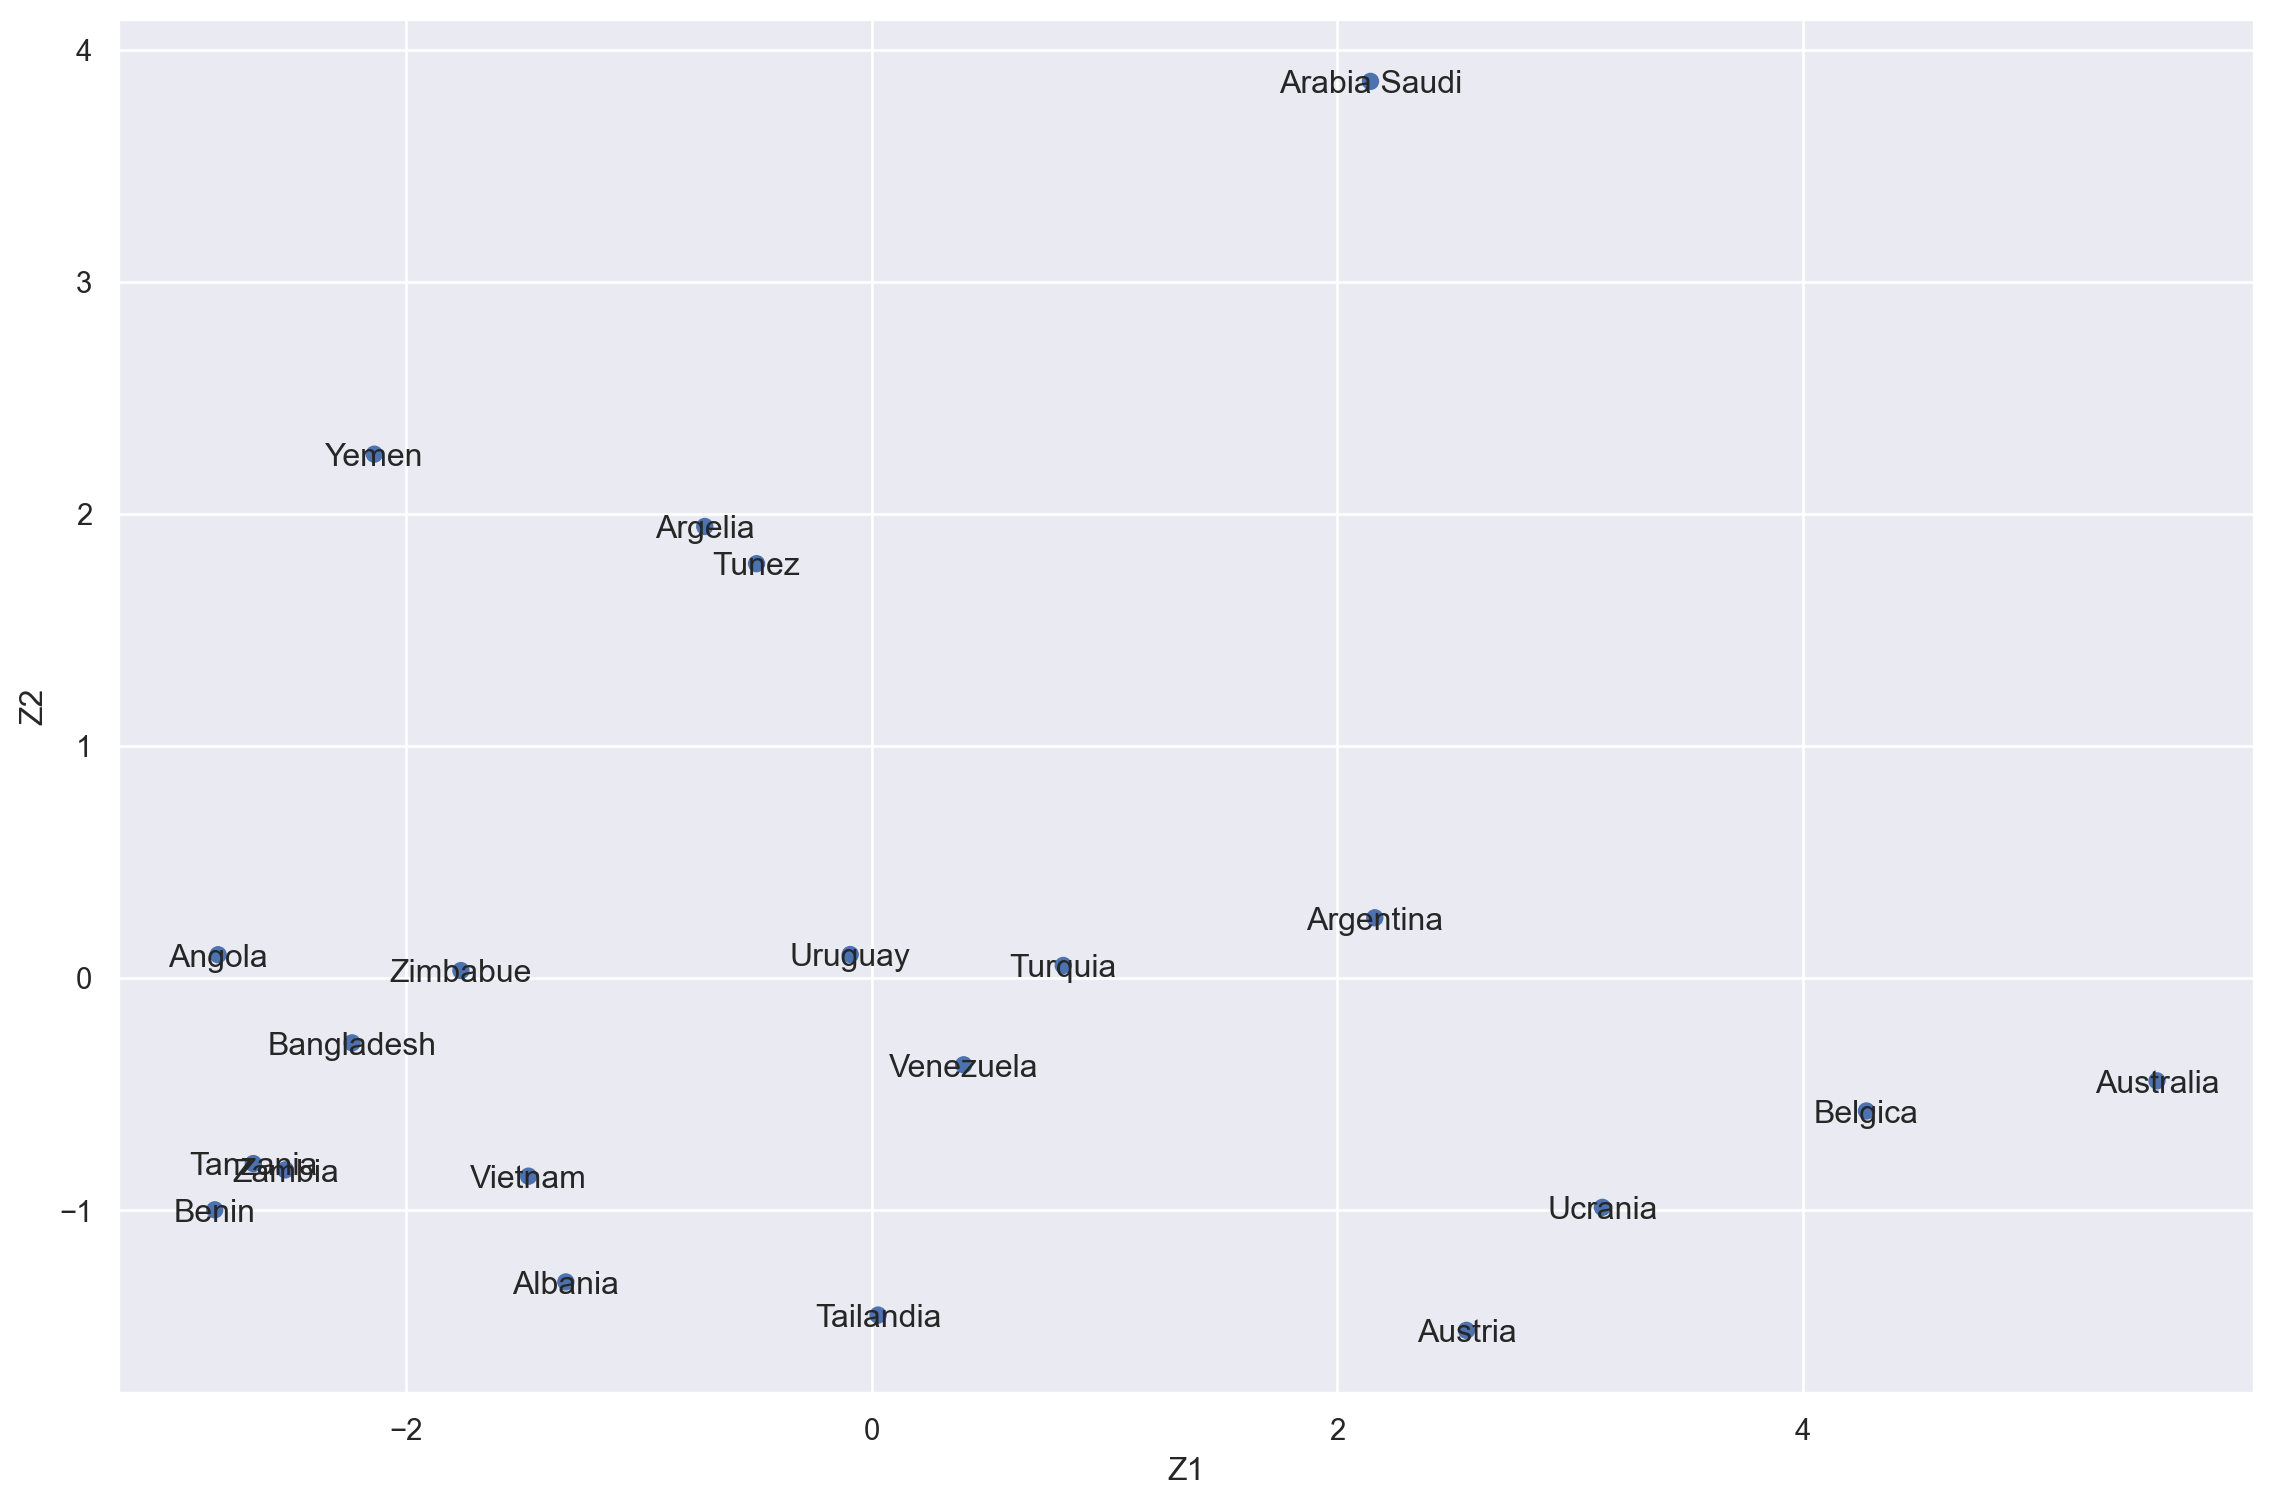

In [77]:
# Graficamos
(
    so.Plot(data = Z, x = "Z1", y = "Z2", text = datos.index)
    .add(so.Dot())
    .add(so.Text())
    .layout(size=(12,8))    
)

In [75]:
# Repetimos todo lo mismo usando los comandos de Python

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X_star)
print(principalComponents)

[[-1.31449773 -1.30911242]
 [-2.80854116  0.10107432]
 [ 2.14269325  3.86532706]
 [-0.71759606  1.94705228]
 [ 2.16123329  0.26038045]
 [ 5.52187172 -0.44233417]
 [ 2.55512467 -1.51768068]
 [-2.23271035 -0.27871845]
 [ 4.27357138 -0.57220135]
 [-2.8227079  -0.99822891]
 [ 0.02696764 -1.45188755]
 [-2.65714166 -0.7989188 ]
 [-0.49508675  1.78661048]
 [ 0.82270995  0.05498649]
 [ 3.13905426 -0.98760323]
 [-0.0926372   0.1019809 ]
 [ 0.39475798 -0.37315616]
 [-1.4748402  -0.85315275]
 [-2.13742482  2.25866815]
 [-2.5194718  -0.82598655]
 [-1.7653285   0.03290091]]


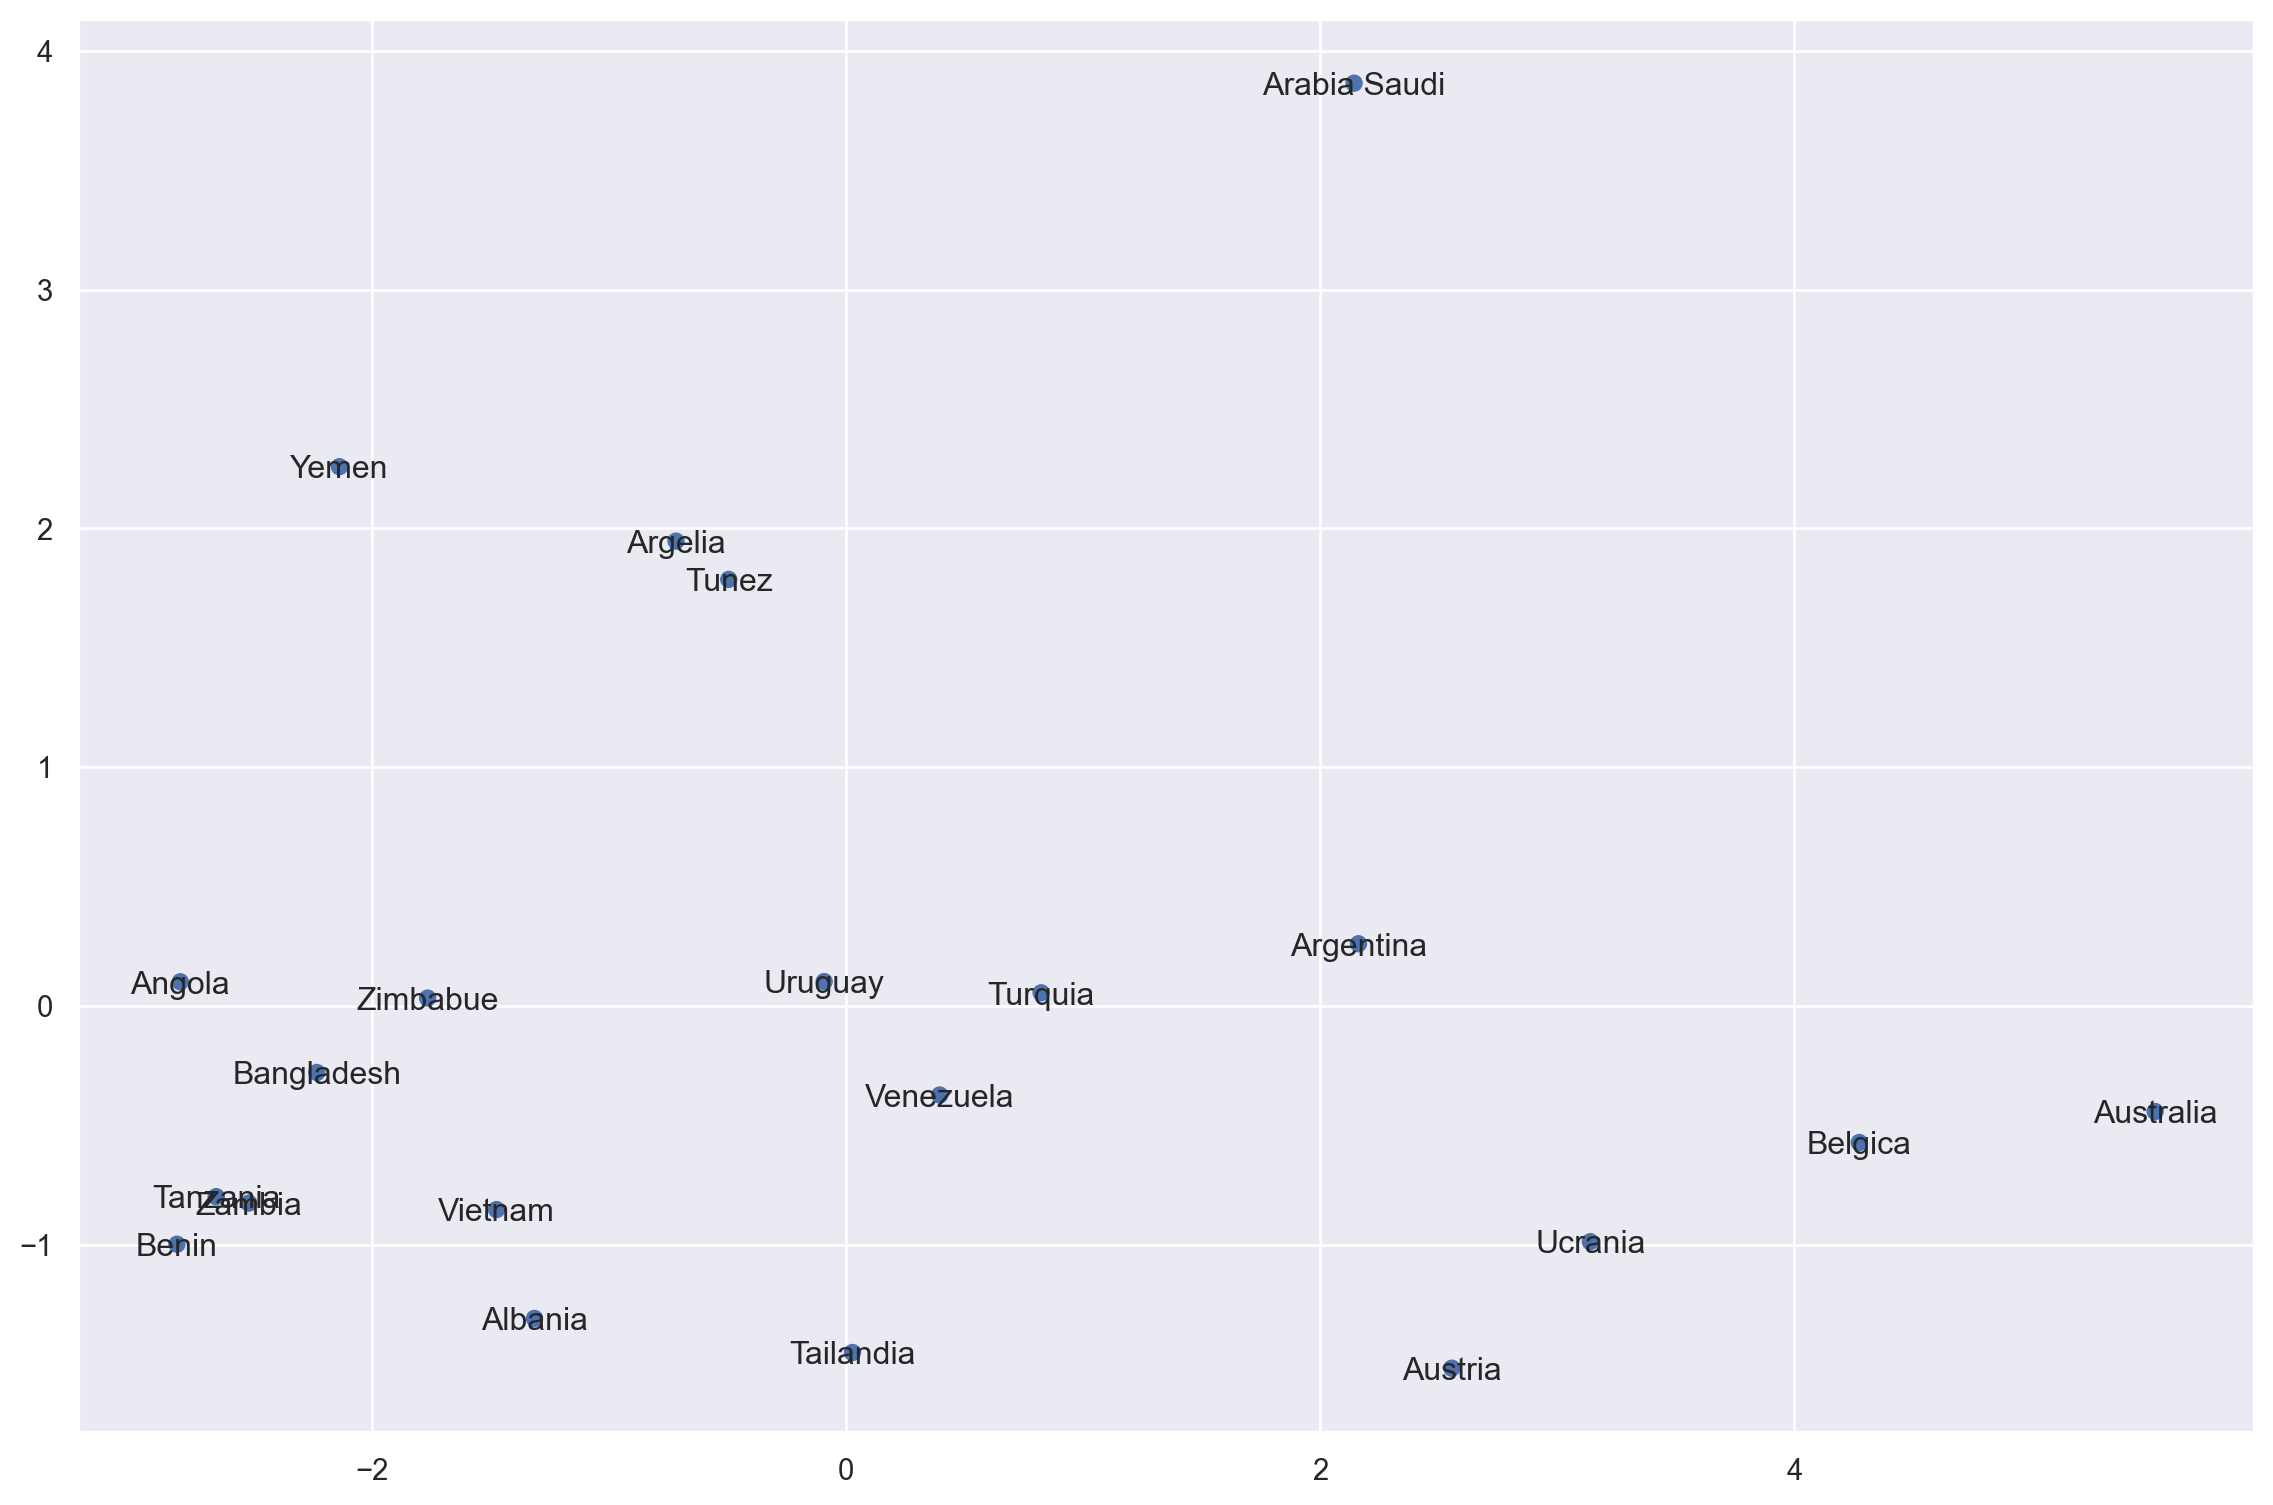

In [76]:
# Graficamos
(
    so.Plot(x = principalComponents[:,0], y = principalComponents[:,1], text = datos.index)
    .add(so.Dot())
    .add(so.Text())
    .layout(size=(12,8))
)

In [72]:
# Veamos que variables aparecen más fuertemente en cada componente
pca.components_

array([[-0.229944  , -0.33938683, -0.08822039,  0.36527495,  0.34690028,
         0.36199866,  0.34936972, -0.0596501 , -0.16597822,  0.38325121,
         0.37323353],
       [-0.45216193, -0.02240731,  0.64948404,  0.0681884 ,  0.05897039,
         0.14205655, -0.01940971,  0.51723603,  0.23972876, -0.08181232,
        -0.11330387]])

**Pregunta** Qué interpretación podemos darle a cada una de las dos componentes?
<details>
    Podemos interpetar que la primera componente agrupa las variables economicas, y la segunda componente las variable sociales.
</details>

**Ejercicio:** calcular la varianza explicada por las primeras componentes principales.

In [35]:


print(A)
av = np.flip(e[0])
print("Autovalores: ", av)
print("Variaza explicada por la primera componente: ", av[0] / sum(av))
print("Variaza explicada por la segunda componente: ", av[1] / sum(av))
print("Variaza explicada por la tercera componente: ", av[2] / sum(av))

NameError: name 'A' is not defined